# Persuasion Technologies Web Scrapping Assignment

**Key Objectives**: The main goal of this project is to extract products data from the Sen Heng-Home Entertainment webpage, perform data preprocessing and exploratory data analysis on the extracted data to identify key insights and patterns, and provide recommendations based on the derived insights.

**Major Assumption:** Since the number of items sold for each product is not available, the number of views has been considered to evaluate the popularity of a product and potential of the product to be sold.


**Key Insights Included:**
>* 1. Top Popular Categories
>* 2. Top Popular Brands - Overall
>* 3. Top Popular Brands - For each Category
>* 4. Top Popular Sub-categories 
>* 5. Discount Range Preferences 
>* 6. Price Range Preferences 
>* 7. Influence of offers on the popularity of products (Cashbacks/Free Gifts)
>* 8. Influence of Monthly Payment on the popularity of products


## Extraction script to scrape product data from SEN HENG-Home Entertainment webpage

In [2]:
#Required Libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC, wait
import time
import threading
from time import sleep
import pandas as pd
from selenium.webdriver.edge.options import Options

#to connect and interact with Chrome browser and it will run in background
options = webdriver.ChromeOptions()
options.add_experimental_option("detach", True)
driver = webdriver.Chrome(options=options)

#Function to close sudden pop ups while looping through the products
def close_popup(driver):
    while True:
        try:
            close_button_locator = (By.XPATH,'/html/body/div[4]/div[2]/div/div/div[1]/div[2]') or (By.XPATH,'/html/body/div[3]/div[2]/div/div/div[1]/div[2]')
            close_button = WebDriverWait(driver, 5).until(EC.element_to_be_clickable(close_button_locator))
            close_button.click()
            print("Pop-up closed")

        except Exception as e:
            print("Failed")
        time.sleep(1)  # Wait for 1 second before checking again


#Funtion to scroll to the bottom of the page to ensure all the products are loaded.
def lesgo():
    # Pop function 
    popup_closer_thread = threading.Thread(target=close_popup, args=(driver,))
    popup_closer_thread.setDaemon(True)
    popup_closer_thread.start()
    
    
    scroll_pause_time = 10 # time given to scroll to bottom
    # website initial maximum page height
    previous_height = driver.execute_script('return document.body.scrollHeight') # Page maximum height
    while True:
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        time.sleep(scroll_pause_time)
        new_height = driver.execute_script('return document.body.scrollHeight')
        if new_height == previous_height:
            driver.execute_script("window.scrollTo(0, 0);")
            break
        previous_height = new_height


def lesgo2(category, sub_category, product_data):
    x = 1
    while True:
        try:
            #Cashback
            cashb = driver.find_element(By.XPATH,
                                           f'/html/body/div[1]/main/div[3]/div[4]/div/div/div/div/div[2]/div/div[{x}]/div/div/div[1]/a/div[2]/div')
            if cashb:
                cashback = 'Yes'
            else:
                cashback = 'No'
            #Free Gift
            fgift = driver.find_element(By.XPATH,
                                           f'/html/body/div[1]/main/div[3]/div[4]/div/div/div/div/div[2]/div/div[{x}]/div/div/div[1]/a/div[2]/div[1]')
            if fgift:
                freegift = 'Yes'
            else:
                freegift = 'No'

            #Accessing the product page                  
            driver.find_element(By.XPATH,f'//*[@id="maincontent"]/div[3]/div[3]/div/div/div/div/div[2]/div/div[{x}]/div/div/div[2]/div/a/p').click()
            sleep(10)
            
            #Product Name
            name = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//*[@id="maincontent"]/div[4]/div[2]/div[1]/h1')))
            product_name = name.text
            print(product_name) 

            #Original Price
            ori_price = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//*[@id="maincontent"]/div[4]/div[2]/div[1]/span[1]/strike')))
            original_price = ori_price.text
           
            #Discounted Price
            disc_price = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//*[@id="maincontent"]/div[4]/div[2]/div[1]/span[2]')))
            discounted_price = disc_price.text

            #Availability
            availability = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//*[@id="maincontent"]/div[4]/div[2]/div[3]/p')))
            availability = availability.text

            #Monthly Installment Payment
            installment = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//*[@id="maincontent"]/div[4]/div[2]/div[7]/button/span[1]/button/div/p[2]')))
            installment = installment.text

            #Num of Views                                                                                            
            views = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//*[@id="maincontent"]/div[4]/div[2]/div[4]/p[2]')))
            num_of_views = views.text 

            #Brand
            specification_tab = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'/html/body/div[1]/main/div[4]/div[3]/div/header/div/div/div/button[2]')))
            specification_tab.click()
            time.sleep(3)
            extracted_element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'/html/body/div[1]/main/div[4]/div[3]/div/div[2]/div/div[2]/ul/li/div/p')))
            brand = extracted_element.text

            #Num of Reviews
            extracted_element2 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'/html/body/div[1]/main/div[4]/div[2]/div[4]/p[1]/text()[1]')))
            if extracted_element:
                num_review = extracted_element.text
            else:
                num_review = 0
    
            #Appending the extracted data into a dictionary
            product_data.append({'Category': category, 'Sub Category': sub_category, 'Cashback': cashback, 
                             'Free Gift': freegift, 'Product Name': product_name, 
                             'Original Price': original_price, 'Discounted Price': discounted_price, 
                             'Availability': availability,'Installment':installment, 'Number of Views': num_of_views,
                              'Brand': brand, 'Number of Reviews' : num_review})
            
            #To access the previous page to access the next product
            driver.execute_script("window.history.go(-1)") 
            sleep(10)
            x = x+1
            print('done')
        except:
            print("failed")
            break
    #Returning the appended dictionary
    return(product_data)
           
        


# Main Function
# Navigate to Sen Heng Home Entertainment Page
driver.get('https://www.senheng.com.my/all-products/home-entertainment.html')
driver.maximize_window()
product_data = []  # Create an empty list to store the scraped data
    
i = 1 # Creating variable to loop each category
#Looping through each Category
while True:
    try:
        #print("i =", i)
        # identify category element and click on it
        category = driver.find_element(By.XPATH,f'//*[@id="scrollable-prevent-tab-{i}"]/span[1]')
        category.click() 
        sleep(10) # giving page to be loaded for 10 secs
        cat_url = driver.current_url # save current pg url
        i = i + 1
        j = 1
        #An inner loop to loop through each sub category
        while True:
            elements = driver.find_elements(By.XPATH, '//*[@id="scrollable-prevent-tab-1"]/span[1]')
            if elements:
                try:
                    #print("j = ", j)
                    sub_cat = driver.find_element(By.XPATH,
                                        f'//*[@id="scrollable-prevent-tab-{j}"]/span[1]')
                    sub_cat.click()
                    sleep(10)
                    #Calling the function to scroll to the bottom of tha page
                    lesgo()
                    #Calling the function to extract data from the sub cateogry page
                    product_data  = lesgo2(category.text, sub_cat.text, product_data) #Passing the category, sub category and an empty dictionary to store the extracted data
                    driver.get(cat_url)
                    sleep(5)
                
                    j = j + 1
                except:
                    driver.get('https://www.senheng.com.my/all-products/home-entertainment.html')
                    sleep(5)
                    break
            else:
                #print('No Sub Cat')
                product = driver.find_elements(By.XPATH,
                                 f'//*[@id="maincontent"]/div[3]/div[4]/div/div/div/div/div[2]/div/div[1]/div/div/div[2]/div/a/p')
                if product:
                    lesgo()
                    sub_cat = ''
                    product_data = lesgo2(category.text, sub_cat, product_data)
                break

    except:
        break
        
# Close the driver
driver.quit()

# Convert the list of dictionaries to a Pandas DataFrame
df = pd.DataFrame(product_data)

Riversong Qube Twins Wireless Speaker
Sony 5.1.2ch Dolby Atmos® - HT-A5000
done
Sony 3.1ch Soundbar HT-A3000
done
LG 420W Soundbar LG-SP8A
done
Sony 2.1ch Soundbar with powerful wireless subwoofer HT-S400
done
LG S65Q 420W 3.1ch High Res Audio Sound Bar with DTS Virtual:X LG-S65Q
done
LG S80QY 480W 3.1.3ch High Res Audio Sound Bar with Dolby Atmos LG-S80QY
done
LG S90QY 570W 5.1.3ch High Res Audio Sound Bar with Dolby Atmos and IMAX Enhanced LG-S90QY
done
LG S95QR 810W 9.1.5ch High Res Audio Sound Bar with Dolby Atmos and IMAX Enhanced LG-S95QR
done
SHARP 20IN SOUNDBAR (60W) SHP-HTSB116
Pop-up closed
Panasonic SC-UX100 Mini Hi-Fi System
done
MSI Gaming Headset Immerse GH20
Sony 3.1ch Soundbar HT-A3000
done
Huawei Sound Joy
MasterLink 50'-100' Tilted Dual Arm Full Motion Wall Mount MSL-5080FM880
done
Masterlink 40' - 63' Basic Fixed Mount MSL-5080FX980
Belkin 2 Meters High Speed HDMI® Cable with Ethernet F3Y021BT2M
Belkin Economy Series 4-Socket Surge Protector F9E400SA3M
Panasonic 50 I

## Imported Libraries for Data Cleaning, EDA and Data Visualization

In [3]:
# Import Libraries 
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning Processes


In [4]:
df.head(3)

,Category,Sub Category,Cashback,Free Gift,Product Name,Original Price,Discounted Price,Availability,Installment,Number of Views,Brand,Number of Reviews
0,TV,LED TVs,No,No,Sharp AQUOS 42 Inch LED TV SHP-2TC42EG1X,"RM 1,649.00","RM 1,279.00",In Stock,"Up to 36 months, as low as 52.00 per month",28 Customers viewed today,Sharp,NaN
1,TV,LED TVs,No,No,Sharp AQUOS 32 Inch Android LED TV SHP-2TC32EG1X,"RM 1,149.00",RM 899.00,In Stock,"Up to 24 months, as low as 49.00 per month",23 Customers viewed today,Sharp,NaN
2,TV,LED TVs,No,No,Sharp AQUOS 50 Inch Android LED TV SHP-2TC50EG1X,"RM 2,299.00","RM 1,699.00",In Stock,"Up to 36 months, as low as 69.00 per month",30 Customers viewed today,Sharp,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           281 non-null    object 
 1   Sub Category       274 non-null    object 
 2   Cashback           281 non-null    object 
 3   Free Gift          281 non-null    object 
 4   Product Name       281 non-null    object 
 5   Original Price     278 non-null    object 
 6   Discounted Price   238 non-null    object 
 7   Availability       281 non-null    object 
 8   Installment        192 non-null    object 
 9   Number of Views    281 non-null    object 
 10  Brand              268 non-null    object 
 11  Number of Reviews  53 non-null     float64
dtypes: float64(1), object(11)
memory usage: 26.5+ KB


## Identifying and Handling Duplicate Values

In [6]:
# Finding number of duplicates in df
df.duplicated().sum()

12

In [7]:
# Drop duplicates by setting the parameter product name column to identify duplicates and kept the first occurrence of duplicate rows and inplace true to applied to the df.
df.drop_duplicates(subset =["Product Name"], keep = 'first', inplace = True) 

In [9]:
df.isnull().sum().sort_values(ascending=False)

Installment          87
Discounted Price     41
Brand                13
Sub Category          7
Original Price        3
Category              0
Cashback              0
Free Gift             0
Product Name          0
Availability          0
Number of Views       0
Number of Reviews     0
dtype: int64

In [10]:
df.head(3)

,Category,Sub Category,Cashback,Free Gift,Product Name,Original Price,Discounted Price,Availability,Installment,Number of Views,Brand,Number of Reviews
0,TV,LED TVs,No,No,Sharp AQUOS 42 Inch LED TV SHP-2TC42EG1X,"RM 1,649.00","RM 1,279.00",In Stock,"Up to 36 months, as low as 52.00 per month",28 Customers viewed today,Sharp,0.0
1,TV,LED TVs,No,No,Sharp AQUOS 32 Inch Android LED TV SHP-2TC32EG1X,"RM 1,149.00",RM 899.00,In Stock,"Up to 24 months, as low as 49.00 per month",23 Customers viewed today,Sharp,0.0
2,TV,LED TVs,No,No,Sharp AQUOS 50 Inch Android LED TV SHP-2TC50EG1X,"RM 2,299.00","RM 1,699.00",In Stock,"Up to 36 months, as low as 69.00 per month",30 Customers viewed today,Sharp,0.0


## Extracting Numerical Values from the 'Number of Views' Variable and Converting Data Types

---



In [11]:
# Extract digits and convert it into integer dtypes.
df['Number of Viewers'] = df['Number of Views'].str.extract(r'(\d+)').astype(int)
df = df.drop('Number of Views',axis=1)

In [12]:
# Removing any non-ASCII characters, commas and RM from the column and converting it into float dtypes.
df['Discounted Price'] = df['Discounted Price'].str.encode('ascii', 'ignore').str.decode('ascii')
df['Discounted Price'] = df['Discounted Price'].str.replace(',', '').str.replace('RM', '').astype('float')

In [13]:
# Removing any non-ASCII characters, commas and RM from the column and converting it into float dtypes.
df['Original Price'] = df['Original Price'].str.encode('ascii', 'ignore').str.decode('ascii')
df['Original Price'] = df['Original Price'].str.replace(',', '').str.replace('RM', '').astype('float')

In [14]:
# Extract the digit and fill in missing value into 0, change into integer dtypes
df['tenure_month'] = df['Installment'].str.extract(r'(\d+)')
df['tenure_month'] = df['tenure_month'].fillna(0).astype(int)
# Extract a decimal number with at least one digit before and after the decimal point.
df['Monthly_payment'] = df['Installment'].str.extract(r'(\d+\.\d+)').astype(float)

In [15]:
df.head(3)

,Category,Sub Category,Cashback,Free Gift,Product Name,Original Price,Discounted Price,Availability,Installment,Brand,Number of Reviews,Number of Viewers,tenure_month,Monthly_payment
0,TV,LED TVs,No,No,Sharp AQUOS 42 Inch LED TV SHP-2TC42EG1X,1649.0,1279.0,In Stock,"Up to 36 months, as low as 52.00 per month",Sharp,0.0,28,36,52.0
1,TV,LED TVs,No,No,Sharp AQUOS 32 Inch Android LED TV SHP-2TC32EG1X,1149.0,899.0,In Stock,"Up to 24 months, as low as 49.00 per month",Sharp,0.0,23,24,49.0
2,TV,LED TVs,No,No,Sharp AQUOS 50 Inch Android LED TV SHP-2TC50EG1X,2299.0,1699.0,In Stock,"Up to 36 months, as low as 69.00 per month",Sharp,0.0,30,36,69.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 280
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           239 non-null    object 
 1   Sub Category       232 non-null    object 
 2   Cashback           239 non-null    object 
 3   Free Gift          239 non-null    object 
 4   Product Name       239 non-null    object 
 5   Original Price     236 non-null    float64
 6   Discounted Price   198 non-null    float64
 7   Availability       239 non-null    object 
 8   Installment        152 non-null    object 
 9   Brand              226 non-null    object 
 10  Number of Reviews  239 non-null    float64
 11  Number of Viewers  239 non-null    int32  
 12  tenure_month       239 non-null    int32  
 13  Monthly_payment    89 non-null     float64
dtypes: float64(4), int32(2), object(8)
memory usage: 26.1+ KB


## Feature Engineering Proccesses

In [18]:
# Define price ranges and their labels
price_ranges = [0, 500, 1000, 2000, 5000, 10000, 20000]
labels = ['Less than 500', '500-1000', '1000-2000', '2000-5000', '5000-10000', 'More than 10000']

# Assign each Original price to a price range
df['Original Price Range'] = pd.cut(df['Original Price'], price_ranges, labels=labels, include_lowest=True)

In [19]:
# Define price ranges and their labels
price_ranges = [0, 500, 1000, 2000, 5000, 10000, 20000]
labels = ['Less than 500', '500-1000', '1000-2000', '2000-5000', '5000-10000', 'More than 10000']

# Assign each discounted price to a price range
df['Price Range'] = pd.cut(df['Discounted Price'], price_ranges, labels=labels, include_lowest=True)

In [20]:
# calculate discount percentage 
df['Discount_Percentage'] = round(((df['Original Price'] - df['Discounted Price']) / df['Original Price']) * 100,2).astype('float')

# replace null values in Discount_Percentage with 0
df['Discount_Percentage'] = df['Discount_Percentage'].fillna(0)

bins = [-0.1, 0, 20, 40, 60, 80, 100]
labels = ['No discount', '1-20%', '20-40%', '40-60%', '60-80%', '80-100%']

df['Discount_Percent_Range'] = pd.cut(df['Discount_Percentage'], bins, labels=labels)

In [21]:
df['Discount_Percent_Range'].value_counts()

1-20%          106
20-40%          80
No discount     41
40-60%          12
60-80%           0
80-100%          0
Name: Discount_Percent_Range, dtype: int64

In [22]:
# define the bins and labels for the monthly payment ranges
bins = [0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0]
labels = ['<RM50', 'RM 50-RM 100', 'RM 100-RM 150', 'RM 150-RM 200', 'RM 200-RM 250', '>RM 250']

# create a new column 'Monthly_Payment_Range' based on the 'Monthly_Payment' column
df['Monthly_Payment_Range'] = pd.cut(df['Monthly_payment'], bins=bins, labels=labels)

In [23]:
df['Monthly_Payment_Range'].value_counts()

RM 50-RM 100     34
RM 100-RM 150    16
RM 150-RM 200    10
RM 200-RM 250     4
>RM 250           3
<RM50             1
Name: Monthly_Payment_Range, dtype: int64

In [24]:
df = df.drop('Installment',axis=1)

In [25]:
df['Offer Type'] = ''
df.loc[(df['Cashback'] == 'Yes') & (df['Free Gift'] == 'No'), 'Offer Type'] = 'Cash Back Only'
df.loc[(df['Cashback'] == 'No') & (df['Free Gift'] == 'Yes'), 'Offer Type'] = 'Free Gift Only'
df.loc[(df['Cashback'] == 'Yes') & (df['Free Gift'] == 'Yes'), 'Offer Type'] = 'Cash Back and Free Gift'
df.loc[(df['Cashback'] == 'No') & (df['Free Gift'] == 'No'), 'Offer Type'] = 'No offerings'


In [26]:
df.head(5)

,Category,Sub Category,Cashback,Free Gift,Product Name,Original Price,Discounted Price,Availability,Brand,Number of Reviews,Number of Viewers,tenure_month,Monthly_payment,Original Price Range,Price Range,Discount_Percentage,Discount_Percent_Range,Monthly_Payment_Range,Offer Type
0,TV,LED TVs,No,No,Sharp AQUOS 42 Inch LED TV SHP-2TC42EG1X,1649.0,1279.0,In Stock,Sharp,0.0,28,36,52.0,1000-2000,1000-2000,22.44,20-40%,RM 50-RM 100,No offerings
1,TV,LED TVs,No,No,Sharp AQUOS 32 Inch Android LED TV SHP-2TC32EG1X,1149.0,899.0,In Stock,Sharp,0.0,23,24,49.0,1000-2000,500-1000,21.76,20-40%,<RM50,No offerings
2,TV,LED TVs,No,No,Sharp AQUOS 50 Inch Android LED TV SHP-2TC50EG1X,2299.0,1699.0,In Stock,Sharp,0.0,30,36,69.0,2000-5000,1000-2000,26.10,20-40%,RM 50-RM 100,No offerings
3,TV,LED TVs,No,No,Panasonic 40 Inch LED TV PSN-TH40L400K,1399.0,1019.0,In Stock,Panasonic,0.0,24,24,56.0,1000-2000,1000-2000,27.16,20-40%,RM 50-RM 100,No offerings
4,TV,LED TVs,Yes,No,Panasonic 32 Inch LED TV PSN-TH32L400K,979.0,799.0,In Stock,Panasonic,0.0,22,18,55.0,500-1000,500-1000,18.39,1-20%,RM 50-RM 100,Cash Back Only


# Exploratory Data Analysis 



### Major Assumption: Since the number of items sold for each product is not available, the number of views has been considered to evaluate the popularity of a product and potential of the product to be sold.


In [27]:
# Finding how many products in each category
df['Category'].value_counts()

TV                 113
Audio               73
Accessories         46
Gaming Consoles      7
Name: Category, dtype: int64

## Insight 1: Top Popular Categories

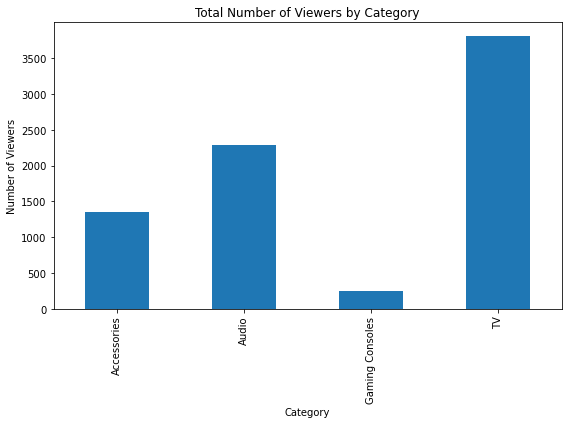

In [28]:
category_viewer_count = df.groupby(['Category'])['Number of Viewers'].sum()

fig, ax = plt.subplots(figsize=(8, 6))
category_viewer_count.plot(kind='bar', ax=ax)
ax.set_title('Total Number of Viewers by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Viewers')
plt.tight_layout()
plt.show()

>* Total 5 categories in Home Entertainment in Sen Heng website such as TV, Audio, Accessories, DVD Players and Gaming Consoles. However, there are no products listed in the DVD Players category indicates less demand in that category.Based on the **absence of data for the DVD Players category**, I will **suggest not to invest resources in that category as it is less likely to generate income for business.**
 

>* Furthermore, the analysis indicates that TV products have a **significantly higher number of viewers**, which suggests that this category is **the most popular and has a higher chance of being sold** compared to other product categories in Sen Heng. On the other hand, **Gaming Consoles have a lesser number of viewers, indicating lower popularity.**



## Insight 2: Top Popular Brands - Overall

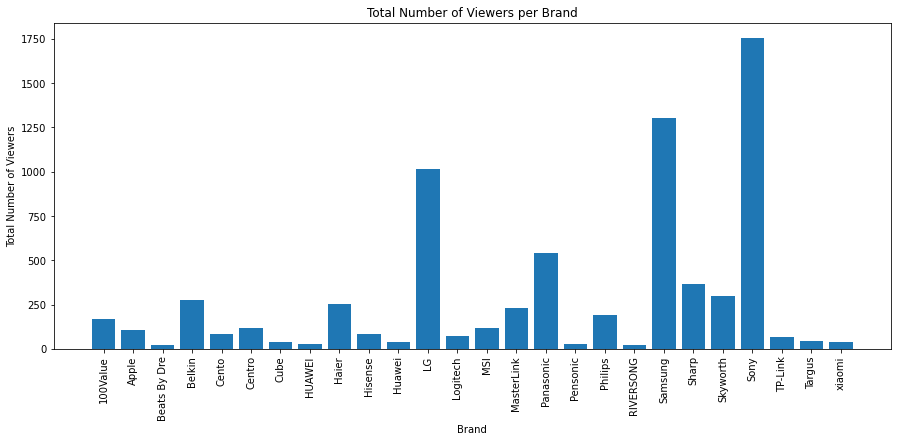

In [29]:
brand_viewers = df.groupby('Brand')['Number of Viewers'].sum().reset_index() #Without resetting the index, the Brand column would not be available as a separate column in the DataFrame, and we would not be able to use it as the x-axis of the bar chart.

plt.figure(figsize=(15, 6)) # set the size of the plot to be 10 inches wide by 6 inches tall
plt.bar(brand_viewers['Brand'], brand_viewers['Number of Viewers'])
plt.xlabel('Brand')
plt.ylabel('Total Number of Viewers')
plt.title('Total Number of Viewers per Brand')
plt.xticks(rotation=90)
plt.show()

>* By focusing on popular brands like **Sony, Samsung, and LG**, a business can potentially increase its sales and revenue as these **brands have a higher level of customer interest and viewership.** 

## Insight 3: Top Popular Brands - For each Category

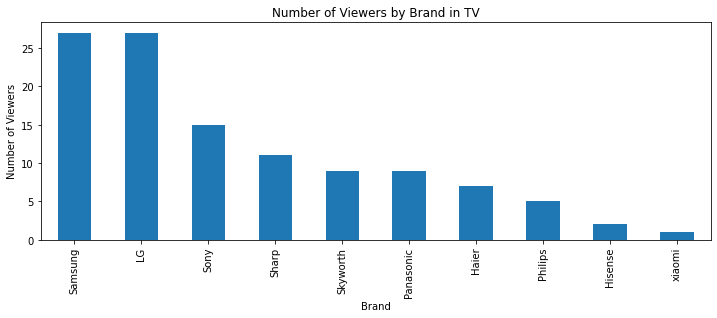

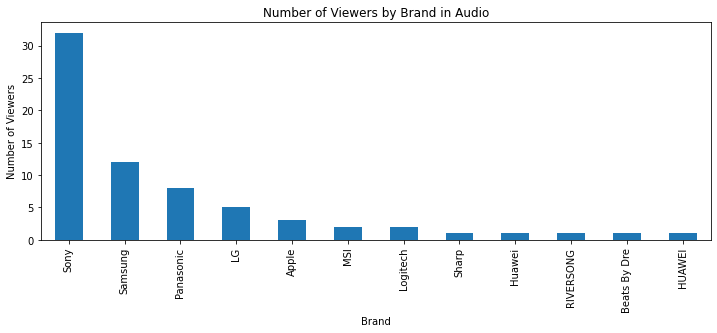

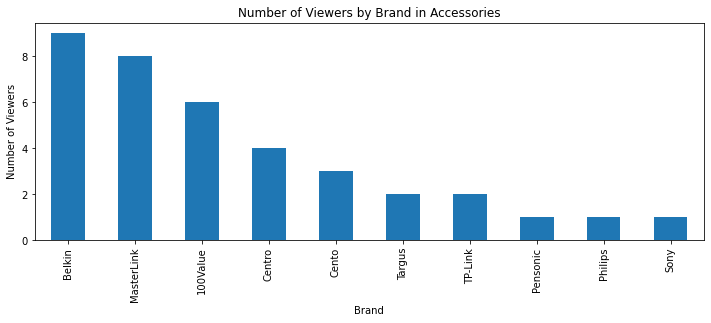

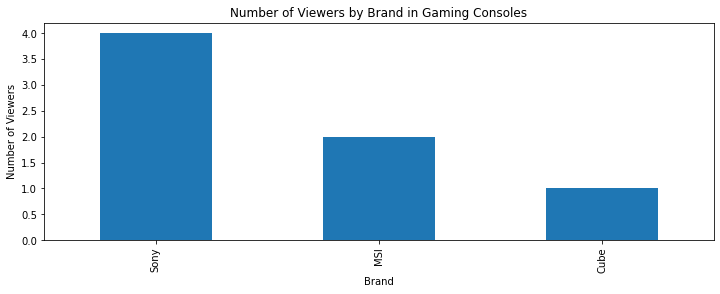

In [30]:
categories = df['Category'].unique()

for cat in categories:
    fig, ax = plt.subplots(figsize=(12,4))
    df_cat = df[df['Category'] == cat]
    df_cat['Brand'].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Number of Viewers by Brand in {cat}")
    ax.set_xlabel("Brand")
    ax.set_ylabel("Number of Viewers")
    plt.show()

>* Based on the charts above, it appears that **Samsung, LG and Sony are the most popular brands in the TV category**, while **Sony is the most popular brand in Audio and Gaming Consoles Category**. Additionally, it appears that **Belkin, Masterlink, and 100Value are the most popular brands in the Accessories category** 

>* The reason behind the popularity of the brand on each category can be depending on several factors. **LG, Samsung and Sony are well-established brands with a reputation for producing high quality and innovative features for TV category.** Similarly, **Sony has been producing high quality audio products and gaming products which contributes to its popularity among customers in the Audio and Gaming consoles category.** While in **Accessories category, Belkin might be knowns for producing high quality and affordable products which compatible with other products.** 

>* From the data, it appears that **customer appeal and showing interest are closely linked to the quality of products.** 

>* Therefore, I will suggest **to focus its resources on sourcing and promoting products from these popular brands and reduce resources allocated to less popular brands.** By doing this, we can **help business to cut costs and their streamline operations.** 

>* It also shows that **Sony offers a wide range of products across different categories**, such as TV, Audio,Accessories and Gaming consoles which actually **attracting a larger audience and increasing the viewership across different product categories.**

## Insight 4: Top Popular Sub-categories 

** Note: Game Consoles does not have sub categories. 

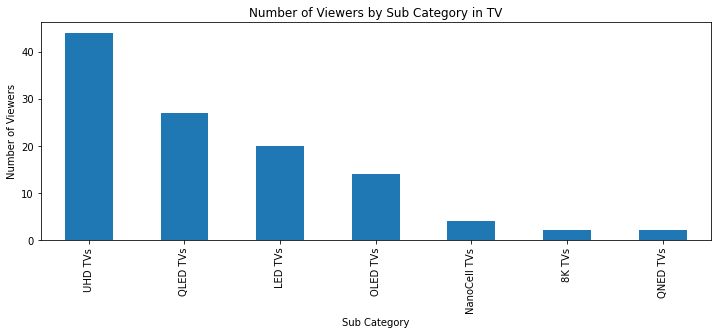

<Figure size 864x432 with 0 Axes>

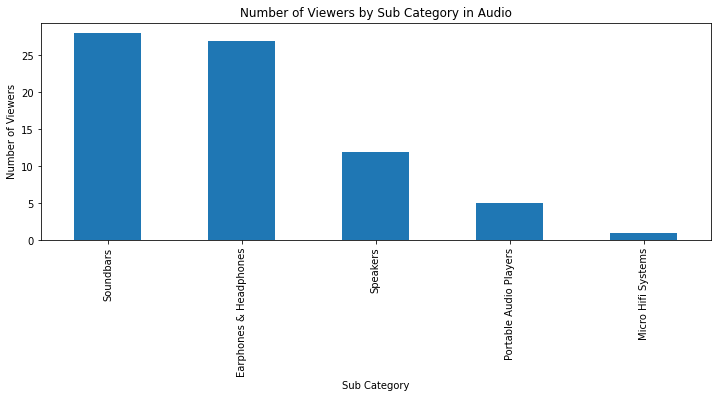

<Figure size 864x432 with 0 Axes>

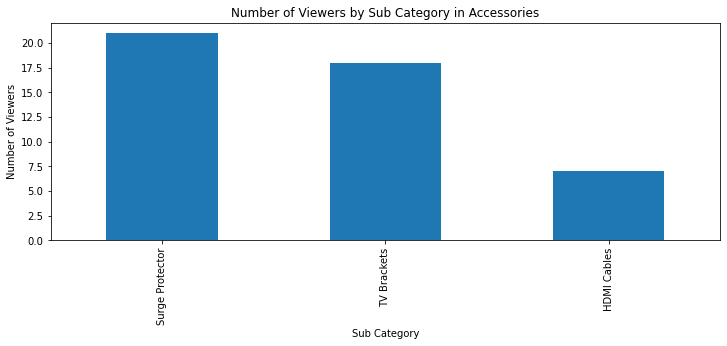

<Figure size 864x432 with 0 Axes>

IndexError: index 0 is out of bounds for axis 0 with size 0

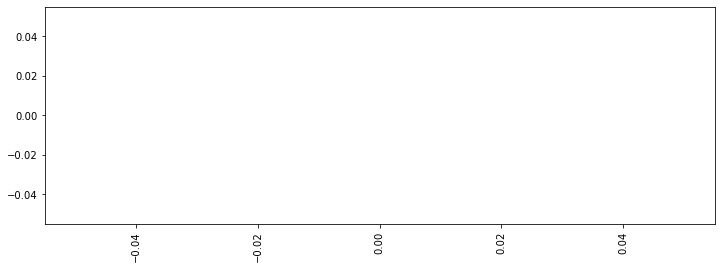

In [33]:
categories = df['Category'].unique()

for cat in categories:
    fig, ax = plt.subplots(figsize=(12,4))
    df_cat = df[df['Category'] == cat]
    df_cat['Sub Category'].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Number of Viewers by Sub Category in {cat}")
    ax.set_xlabel("Sub Category")
    ax.set_ylabel("Number of Viewers")
    fig = plt.figure(figsize=(12, 6))
    plt.show()

>* As per charts, it depicts clearly that **UHD TVs in TV category**,**Soundbars and Earphones & Heaphones in Audio Category** and **Surge Protector in Accessories Category** have higher numbers of viewers which indicates that these products are popular among customers. 


>* Since these products **have a higher chance of selling well**,then I will suggest to focus on **providing special offer types or cross sell on other non popular products** to entice customers to purchase the products. For example, can cross sell by offering a soundbar as a complementary product to customer who purchasing TV with business. The mat attract customer to buy soundsbar as it can enhance the TV experience when watching.   

## Insight 5: Price Range Preferences 

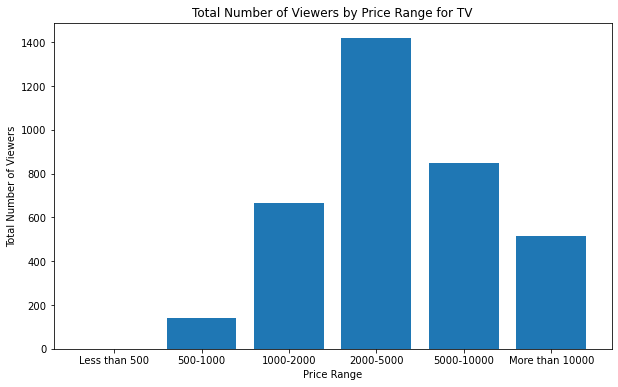

In [34]:
# filter the data to include only the TV category
tv_df = df[df['Category'] == 'TV']


grouped_df = tv_df.groupby('Price Range')['Number of Viewers'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(grouped_df['Price Range'], grouped_df['Number of Viewers'])
ax.set_xlabel('Price Range')
ax.set_ylabel('Total Number of Viewers')
ax.set_title('Total Number of Viewers by Price Range for TV')
plt.show()

>* The above chart indicates that the **majority of customers viewed products with a price range between 2000-5000** in TV category.We can assume that most customers prefer to purchase TV within this price range.

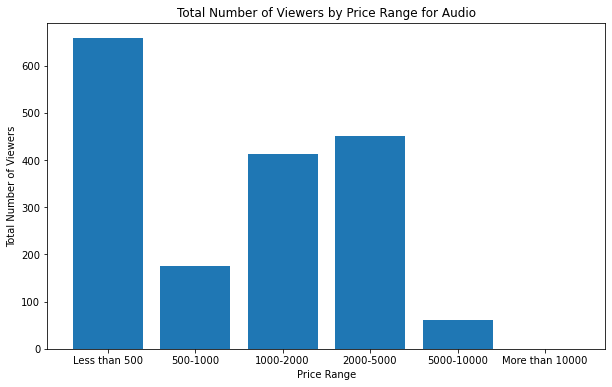

In [35]:
audio_df = df[df['Category'] == 'Audio']


grouped_df = audio_df.groupby('Price Range')['Number of Viewers'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(grouped_df['Price Range'], grouped_df['Number of Viewers'])
ax.set_xlabel('Price Range')
ax.set_ylabel('Total Number of Viewers')
ax.set_title('Total Number of Viewers by Price Range for Audio')
plt.show()

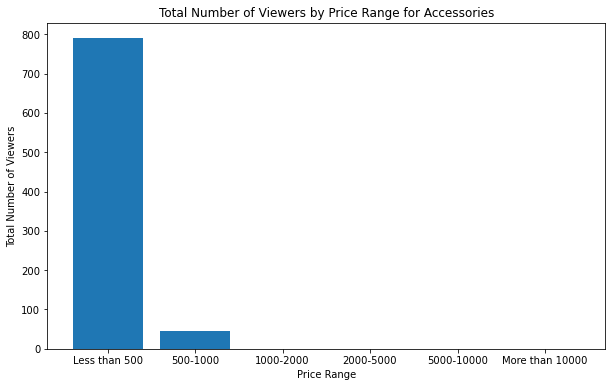

In [36]:
accessories_df = df[df['Category'] == 'Accessories']


grouped_df = accessories_df.groupby('Price Range')['Number of Viewers'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(grouped_df['Price Range'], grouped_df['Number of Viewers'])
ax.set_xlabel('Price Range')
ax.set_ylabel('Total Number of Viewers')
ax.set_title('Total Number of Viewers by Price Range for Accessories')
plt.show()

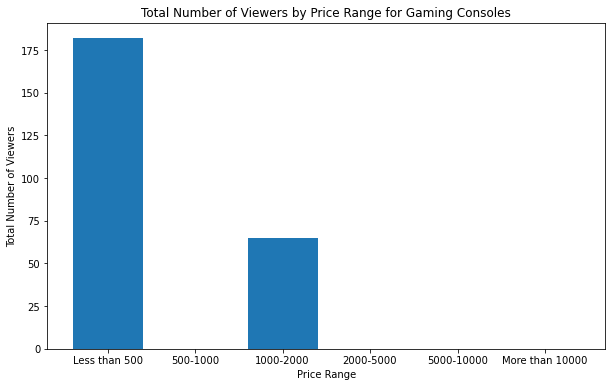

In [37]:
gameconsole_df = df[df['Category'] == 'Gaming Consoles']


grouped_df = gameconsole_df.groupby('Original Price Range')['Number of Viewers'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(grouped_df['Original Price Range'], grouped_df['Number of Viewers'])
ax.set_xlabel('Price Range')
ax.set_ylabel('Total Number of Viewers')
ax.set_title('Total Number of Viewers by Price Range for Gaming Consoles')
plt.show()

>* The above charts indicates that for the **audio, accessories and Gaming Consoles category**, the majority of customers viewed products with a **price range less than 500.** Based on this observation, we can assume that customers are more **interested in purchasing audio accessories and Gaming Consoles products within less than 500 price range.**

## Insight 6: Discount Range Preferences 

**Note: Gaming Consoles doesn't have any discount products.

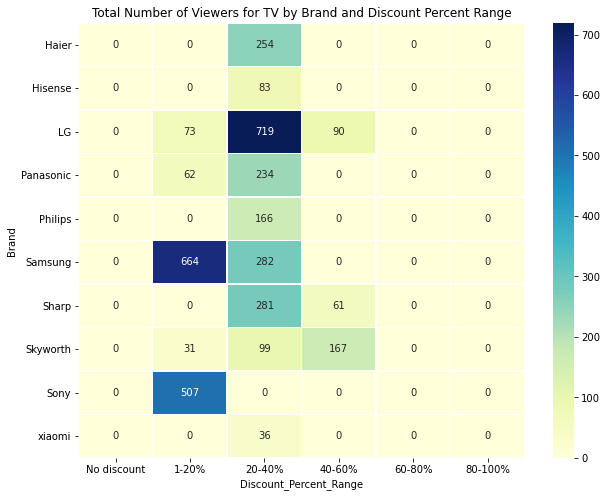

In [38]:
# Filter the data for category=='TV'
df_tv = df[df['Category'] == 'TV']

tv_viewers = df_tv.groupby(['Brand', 'Discount_Percent_Range'])['Number of Viewers'].sum().reset_index()
tv_viewers_pivot = tv_viewers.pivot(index='Brand', columns='Discount_Percent_Range', values='Number of Viewers')

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(tv_viewers_pivot, cmap='YlGnBu', annot=True, fmt=',', linewidths=.5, ax=ax)
ax.set_title('Total Number of Viewers for TV by Brand and Discount Percent Range')
plt.show()

>* Another way to increase conversion rate of customer to purchase is by providing discounts to the products. In this case, it seems that offering a discount in the range of 20-40% can be effective in attracting viewers and potentially increasing sales in the TV category. Therefore, **offering discounts within this range on popular products in TV category** can increase the likelihood of customers making a purchase. 

>* Can **use this discount range to promote on non popular products in TV category** which can attract potential customers who may have been hesitant to purchase the product at its original price. 

>* In terms of **Sony and Samsung, the both brands having a higher number of viewers despite offering smaller discounts (1-20%), this could be due to their brand reputation, product quality, or other factors.**



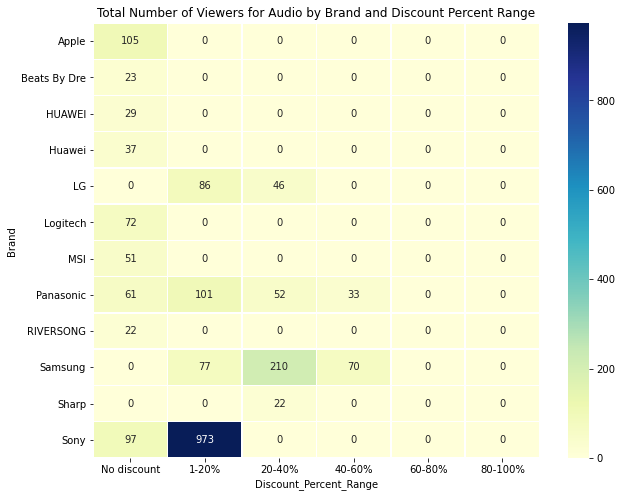

In [39]:
# Filter the data for category=='Audio'
df_audio = df[df['Category'] == 'Audio']

audio_viewers = df_audio.groupby(['Brand', 'Discount_Percent_Range'])['Number of Viewers'].sum().reset_index()
audio_viewers_pivot = audio_viewers.pivot(index='Brand', columns='Discount_Percent_Range', values='Number of Viewers')

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(audio_viewers_pivot, cmap='YlGnBu', annot=True, fmt=',', linewidths=.5, ax=ax)
ax.set_title('Total Number of Viewers for Audio by Brand and Discount Percent Range')
plt.show()

>* For Audio Category, high number of viewers are **attracted to products with and without discount ranges**. However,Sony's  strategy of **offering discounts within the 1-20% range and high quality of products which contributes to their popularity among viewers.** This suggests that customers are more likely to be drawn to products with moderate discounts rather than deep discounts or no discounts at all.


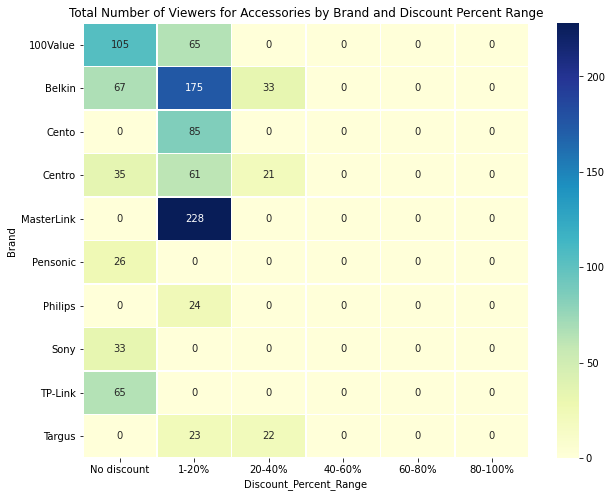

In [40]:
# Filter the data for category=='Accessories'
accessories_tv = df[df['Category'] == 'Accessories']

accessories_viewers = accessories_tv.groupby(['Brand', 'Discount_Percent_Range'])['Number of Viewers'].sum().reset_index()
accessories_viewers_pivot = accessories_viewers.pivot(index='Brand', columns='Discount_Percent_Range', values='Number of Viewers')

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(accessories_viewers_pivot, cmap='YlGnBu', annot=True, fmt=',', linewidths=.5, ax=ax)
ax.set_title('Total Number of Viewers for Accessories by Brand and Discount Percent Range')
plt.show()

>* For Accessory Category, high number of viewers are **attracted to products with discount ranges between 1-20%**, which suggests that this is a popular discount range among customers. Accessory products, which may not have high viewership or sales initially can offer discounts within the popular discount range, the business can **create a demand for these products to increase the sales.**


## Insight 7: Influence of offers on the popularity of products (Cashbacks/Free Gifts)

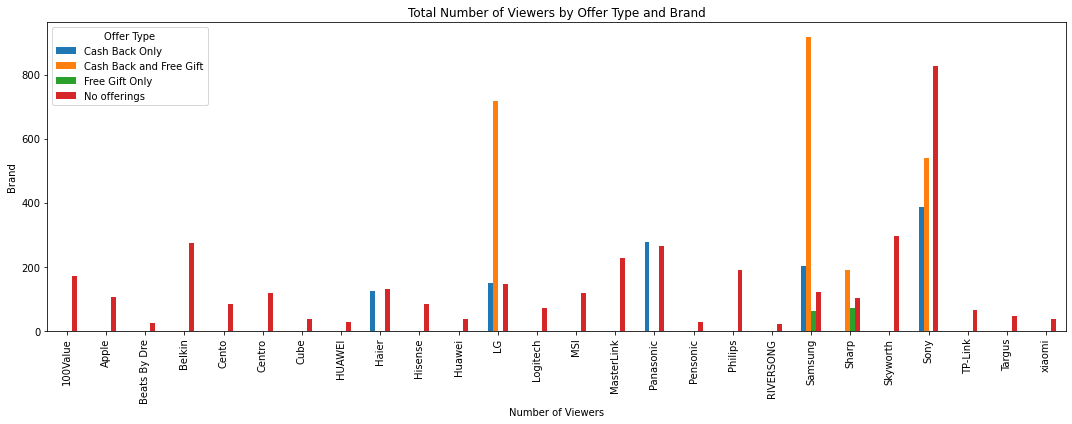

In [41]:
# Calculate the total number of viewers by offer type for each category
offer_stats = df.groupby(['Brand', 'Offer Type'])['Number of Viewers'].sum().reset_index()


offer_stats_pivot = offer_stats.pivot(index='Brand', columns='Offer Type', values='Number of Viewers')
ax = offer_stats_pivot.plot(kind='bar', stacked=False, figsize=(15,6))
ax.set_title('Total Number of Viewers by Offer Type and Brand')
ax.set_xlabel('Number of Viewers')
ax.set_ylabel('Brand')
plt.tight_layout()
plt.show()


>* Offer type is another factor that can influence customers to make a purchase as they **tend to pay more attention to offers after discounts.**

>* The charts indicates that customers are attracted to **brands that offer cash back and free gift**, such as LG, and Samsung as it shows higher viewers. 

>* However, even though Sony **does not offer any promotional deals, it still holds a high viewership, indicating that it has a strong brand reputation and it does not require any offerings to attract customers.**

>* It seems that **cash back offers also brings in equal number of viewers for Panasonic brand as much as products without any offers.**  

## Insight 8: Influence of Monthly Payment on the popularity of products

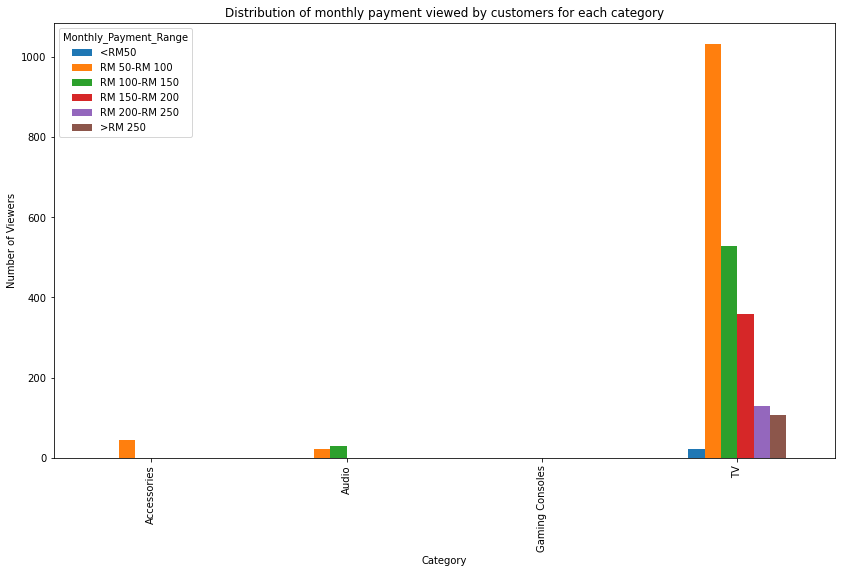

In [42]:
df_monthlypayment = df.groupby(['Monthly_Payment_Range'])['Number of Viewers'].sum()
# Calculate the total number of viewers by offer type for each category
df_monthlypayment = df.groupby(['Category', 'Monthly_Payment_Range'])['Number of Viewers'].sum().reset_index()


df_monthlypaymentpivot = df_monthlypayment.pivot(index='Category', columns='Monthly_Payment_Range', values='Number of Viewers')
ax = df_monthlypaymentpivot.plot(kind='bar', stacked=False, figsize=(14,8))
ax.set_title('Distribution of monthly payment viewed by customers for each category')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Viewers')
#plt.tight_layout()
plt.show()



>* Based on the analysis above, it appears that a high number of customers viewed products with a monthly payment within the range of RM50-RM100 for the TV categories. However, for the TV category, products with a maximum monthly payment range of more than RM250 but have fewer viewers. Therefore, we can assume that **customers prefer to pay within the range of RM50-RM150 as a monthly payment for TV categories.** 